Setup

In [1]:
import json
import os
import numpy as np
import pandas as pd
from IPython.display import display
import pprint
import tensorflow as tf

Dataset Directory

In [2]:
DIR = './data/cleaned/'
fn_books = 'goodreads_books_mystery_thriller_crime.pkl'
fn_reviews = 'goodreads_reviews_mystery_thriller_crime.pkl'

In [3]:
df_reviews = pd.read_pickle(os.path.join(DIR, fn_reviews))
df_books = pd.read_pickle(os.path.join(DIR, fn_books))

In [4]:
df_reviews.head()

,user_id,book_id,rating,review_text
review_id,,,,
5e212a62bced17b4dbe41150e5bb9037,8842281e1d1347389f2ab93d60773d4d,6392944,3,I haven't read a fun mystery book in a while a...
2ede853b14dc4583f96cf5d120af636f,8842281e1d1347389f2ab93d60773d4d,28684704,3,"A fun, fast paced science fiction thriller. I ..."
8e4d61801907e591018bdc3442a9cf2b,8842281e1d1347389f2ab93d60773d4d,32283133,0,http://www.telegraph.co.uk/culture/10...
022bb6daffa49adc27f6b20b6ebeb37d,8842281e1d1347389f2ab93d60773d4d,17860739,4,An amazing and unique creation: JJ Abrams and ...
0e317947e1fd341f573192111bb2921d,8842281e1d1347389f2ab93d60773d4d,8694005,3,The Name of the Rose is a thrilling Dan Brown-...


In [5]:
df_books.head()

,title,text_reviews_count,popular_shelves,average_rating,description,author_id,author_name
book_id,,,,,,,
6066814,"b'Crowner Royal (Crowner John Mystery, #13)'",15,"[{'count': '159', 'name': 'to-read'}, {'count'...",3.93,"London, 1196. At the command of Richard the Li...",37778,Bernard Knight
33394837,"b""The House of Memory (Pluto's Snitch #2)""",60,"[{'count': '54', 'name': 'currently-reading'},...",4.33,,242185,Carolyn Haines
29074697,b'The Slaughtered Virgin of Zenopolis (Inspect...,23,"[{'count': '90', 'name': 'to-read'}, {'count':...",3.49,"BATHS, BANKS AND ROMAN INSURRECTION Detective ...",15104629,David Blake
1902202,"b'Dead in the Morning (Patrick Grant, #1)'",8,"[{'count': '51', 'name': 'to-read'}, {'count':...",3.30,"Gerald breezily introduced his wife, Helen, to...",190988,Margaret Yorke
9671977,b'Aristotele e i misteri di Eleusi',3,"[{'count': '48', 'name': 'to-read'}, {'count':...",3.54,"""I misteri di Eleusi"" e il quinto romanzo di A...",337108,Margaret Doody


In [6]:
df_join = pd.merge(df_reviews, df_books, left_on="book_id", right_index=True)
df_join.head()

,user_id,book_id,rating,review_text,title,text_reviews_count,popular_shelves,average_rating,description,author_id,author_name
review_id,,,,,,,,,,,
0e317947e1fd341f573192111bb2921d,8842281e1d1347389f2ab93d60773d4d,8694005,3,The Name of the Rose is a thrilling Dan Brown-...,b'The Name of the Rose',99,"[{'count': '8209', 'name': 'to-read'}, {'count...",4.11,The year is 1327. Franciscans in a wealthy Ita...,1730,Umberto Eco
4276918357312212384ac6415ceb9159,8842281e1d1347389f2ab93d60773d4d,6652906,3,** spoiler alert ** Hooked me equally as wel...,"b'The Girl Who Played with Fire (Millennium, #2)'",772,"[{'count': '6613', 'name': 'fiction'}, {'count...",4.22,"Part blistering espionage thriller, part rivet...",706255,Stieg Larsson
9ee704921386f88893900829c037abd0,4fdf8e419e36ae2e82bc44376768e280,6652906,4,Don't start these books unless you're ready to...,"b'The Girl Who Played with Fire (Millennium, #2)'",772,"[{'count': '6613', 'name': 'fiction'}, {'count...",4.22,"Part blistering espionage thriller, part rivet...",706255,Stieg Larsson
26e59823f1936fe9030d85262f1477e1,446728d221c1343b92e1e4ff5545a843,6652906,5,Loved it! Not as much as the first but it this...,"b'The Girl Who Played with Fire (Millennium, #2)'",772,"[{'count': '6613', 'name': 'fiction'}, {'count...",4.22,"Part blistering espionage thriller, part rivet...",706255,Stieg Larsson
83370bd38023a2fd928b2b6114c2b210,fe0ad83a30bcd7fbe65ac1670b2b01e1,6652906,5,Once again Larsson does not disappoint. Althou...,"b'The Girl Who Played with Fire (Millennium, #2)'",772,"[{'count': '6613', 'name': 'fiction'}, {'count...",4.22,"Part blistering espionage thriller, part rivet...",706255,Stieg Larsson


In [7]:
df_join.dtypes

user_id                object
book_id                uint32
rating                  uint8
review_text            object
title                  object
text_reviews_count     uint32
popular_shelves        object
average_rating        float64
description            object
author_id               int64
author_name            object
dtype: object

### Define Base Feature Columns
First, let's define the base categorical and continuous feature columns that we'll use. These base columns will be the building blocks used by both the wide part and the deep part of the model.

In [8]:
df_simplified = df_join[["user_id", "book_id", "rating", "review_text", "title", "description", "author_id"]]

In [9]:
labels = tf.constant(df_join['rating'])

In [10]:
labels

<tf.Tensor: shape=(22726,), dtype=string, numpy=
array([b'0e317947e1fd341f573192111bb2921d',
       b'4276918357312212384ac6415ceb9159',
       b'9ee704921386f88893900829c037abd0', ...,
       b'2b6a65954eb5acc9ba251a9b61d9af5a',
       b'f0ff906a26b8894858eab817731faaaf',
       b'921812c9edc173c6d12e000723b9e667'], dtype=object)>

In [11]:
df_simplified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22726 entries, 0e317947e1fd341f573192111bb2921d to 921812c9edc173c6d12e000723b9e667
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      22726 non-null  object
 1   book_id      22726 non-null  uint32
 2   rating       22726 non-null  uint8 
 3   review_text  22726 non-null  object
 4   title        22726 non-null  object
 5   description  22726 non-null  object
 6   author_id    22726 non-null  int64 
dtypes: int64(1), object(4), uint32(1), uint8(1)
memory usage: 1.1+ MB


In [12]:
joined_slices = tf.data.Dataset.from_tensor_slices((dict(df_simplified), labels))

for feature_batch, label in joined_slices.take(1):
  print("label: ", label)
  for key, value in feature_batch.items():
    print("{!r:20s}: {}".format(key, value))


label:  tf.Tensor(b'0e317947e1fd341f573192111bb2921d', shape=(), dtype=string)
'user_id'           : b'8842281e1d1347389f2ab93d60773d4d'
'book_id'           : 8694005
'rating'            : 3
'review_text'       : b'The Name of the Rose is a thrilling Dan Brown-esque murder mystery set in a 14th century Italian monastery. It really is two stories - the story of the murder mystery, and that of political climate in Italy at the time. And of course, they nicely interweave throughout.   The history the book brought was one of my favorite parts. I learned about how the church controlled so much of the world, how even then it was already starting to fall from power, why saints are so prevalent in Italy, and more. I learned about Franciscans and Dolcians and minorites, and poverity and false monks. Poverty was a big theme, which came through on several levels: rebellions by poor people and religious leaders stepping in to lead the masses, and also an a debate about the role the Church should h

In [13]:
dataset = joined_slices
dataset

<TensorSliceDataset shapes: ({user_id: (), book_id: (), rating: (), review_text: (), title: (), description: (), author_id: ()}, ()), types: ({user_id: tf.string, book_id: tf.uint32, rating: tf.uint8, review_text: tf.string, title: tf.string, description: tf.string, author_id: tf.int64}, tf.string)>

In [14]:
inputs = {
  'user_id': tf.keras.Input(shape=(), dtype='string'),
  'book_id': tf.keras.Input(shape=(), dtype='uint32'),
  'rating': tf.keras.Input(shape=(), dtype='uint8'),
  'review_text': tf.keras.Input(shape=(), dtype='string'),
  'title': tf.keras.Input(shape=(), dtype='string'),
  'description': tf.keras.Input(shape=(), dtype='string'),
  'author_id': tf.keras.Input(shape=(), dtype='int64'),
}

Normalize Ratings

In [15]:
rating_normalization = tf.keras.layers.Normalization(name="rating_normalization")
rating_normalization.adapt(df_simplified['rating'])

Encode integer IDs using IntegerLookup

In [16]:
book_id_lookup_layer = tf.keras.layers.IntegerLookup(name="book_id_lookup")
book_id_lookup_layer.adapt(df_simplified['book_id'])

In [17]:
author_id_lookup_layer = tf.keras.layers.IntegerLookup(name="author_id_lookup")
author_id_lookup_layer.adapt(df_simplified['author_id'])

Encode string data into integers

In [18]:
user_id_lookup_layer = tf.keras.layers.StringLookup(name="user_id_lookup")
user_id_lookup_layer.adapt(df_simplified['user_id'])

unknown words:

In [19]:
# Try out the layer
print(
    "Encoded text:\n", user_id_lookup_layer(["The Brain is deeper than the sea"]).numpy(),
)

Encoded text:
 [0]


known "word" aka user-id string

In [20]:
# Try out the layer
print(
    "Encoded text:\n", user_id_lookup_layer(["8842281e1d1347389f2ab93d60773d4d"]).numpy(),
)

Encoded text:
 [963]


In [21]:
title_lookup_layer = tf.keras.layers.StringLookup(name="title_lookup")
title_lookup_layer.adapt(df_simplified['title'])

Embedding larger String data

In [22]:
review_text_vectorization = tf.keras.layers.TextVectorization(name="review_text_vectorization")
review_text_vectorization.adapt(df_simplified['review_text'])

In [23]:
description_vectorization = tf.keras.layers.TextVectorization(name="description_vectorization")
description_vectorization.adapt(df_simplified['description'])

In [24]:
# Try out the layer
print(
    "Encoded text:\n", description_vectorization(["The Brain is deeper than the sea"]).numpy(),
)

Encoded text:
 [[   2 2631    8  428   67    2 1251]]


In [25]:
inputs

{'user_id': <KerasTensor: shape=(None,) dtype=string (created by layer 'input_1')>,
 'book_id': <KerasTensor: shape=(None,) dtype=uint32 (created by layer 'input_2')>,
 'rating': <KerasTensor: shape=(None,) dtype=uint8 (created by layer 'input_3')>,
 'review_text': <KerasTensor: shape=(None,) dtype=string (created by layer 'input_4')>,
 'title': <KerasTensor: shape=(None,) dtype=string (created by layer 'input_5')>,
 'description': <KerasTensor: shape=(None,) dtype=string (created by layer 'input_6')>,
 'author_id': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'input_7')>}

In [26]:
outputs = {
  'user_id': user_id_lookup_layer(inputs['user_id']),
  'book_id': book_id_lookup_layer(inputs['book_id']),
  'rating': rating_normalization(inputs['rating']),
  'review_text': review_text_vectorization(inputs['review_text']),
  'title': title_lookup_layer(inputs['title']),
  'description': description_vectorization(inputs['description']),
  'author_id': author_id_lookup_layer(inputs['author_id']),
}

In [27]:
outputs

{'user_id': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'user_id_lookup')>,
 'book_id': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'book_id_lookup')>,
 'rating': <KerasTensor: shape=(1, None) dtype=float32 (created by layer 'rating_normalization')>,
 'review_text': <KerasTensor: shape=(None, None) dtype=int64 (created by layer 'review_text_vectorization')>,
 'title': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'title_lookup')>,
 'description': <KerasTensor: shape=(None, None) dtype=int64 (created by layer 'description_vectorization')>,
 'author_id': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'author_id_lookup')>}

In [28]:
preprocessing_model = tf.keras.Model(inputs, outputs)
preprocessing_model

In [29]:
next(dataset.take(1).as_numpy_iterator())

({'user_id': b'8842281e1d1347389f2ab93d60773d4d',
  'book_id': 8694005,
  'rating': 3,
  'review_text': b'The Name of the Rose is a thrilling Dan Brown-esque murder mystery set in a 14th century Italian monastery. It really is two stories - the story of the murder mystery, and that of political climate in Italy at the time. And of course, they nicely interweave throughout.   The history the book brought was one of my favorite parts. I learned about how the church controlled so much of the world, how even then it was already starting to fall from power, why saints are so prevalent in Italy, and more. I learned about Franciscans and Dolcians and minorites, and poverity and false monks. Poverty was a big theme, which came through on several levels: rebellions by poor people and religious leaders stepping in to lead the masses, and also an a debate about the role the Church should have in society.   I loved brother William of baskerville. He was Sherlock Holmes-esque (so that can\'t be a c

In [30]:
# Apply the preprocessing in tf.data.Dataset.map.
dataset_preprocessed = dataset.map(lambda x, y: (preprocessing_model(x), y),
                      num_parallel_calls=tf.data.AUTOTUNE)
# Display a preprocessed input sample.
next(dataset_preprocessed.take(1).as_numpy_iterator())

({'user_id': 963,
  'book_id': 7589,
  'rating': array([[-0.5969872]], dtype=float32),
  'review_text': array([    2,   432,     7,     2,  1539,     8,     4,  1004,   470,
         38918,   135,    67,   249,     9,     4,  9002,  1389,  2696,
         11561,    11,    48,     8,   109,   187,     2,    26,     7,
             2,   135,    67,     3,    12,     7,  1052, 11907,     9,
          3574,    36,     2,    71,     3,     7,   350,    55,  1238,
         16531,   377,     2,   399,     2,    14,   774,    13,    24,
             7,    35,   304,   418,     6,  1081,    39,    68,     2,
          1754,  6327,    30,    70,     7,     2,   195,    68,    84,
           114,    11,    13,   415,  1020,     5,   804,    40,   948,
           151, 24609,    29,    30,  7092,     9,  3574,     3,    38,
             6,  1081,    39, 72221,     3, 76181,     3, 60908,     3,
         55188,     3,  2235,  6442,  4549,    13,     4,   318,  1261,
            79,   378,   119,    2

## Dataset wird jetzt erfolgreich encodiert

Rating ist eigentlich die einzige numerische, "kontinuierliche" Spalte... hm.

### The Wide Model: Linear Model with Crossed Feature Columns
The wide model is a linear model with a wide set of sparse and crossed feature columns:

### Crossed Column is not implemented in Keras

In [31]:
linear_columns = [
    user_id_lookup_layer,
    book_id_lookup_layer,
    author_id_lookup_layer,
    rating_normalization,
]
# linear_columns = [
#     user_id_lookup_layer(inputs['user_id']),
#     book_id_lookup_layer(inputs['book_id']),
#     author_id_lookup_layer(inputs['author_id']),
#     rating_normalization(inputs['rating']),
# ]
# linear_columns = [
#     outputs["user_id"],
#     outputs["book_id"],
#     outputs["author_id"],
#     outputs["rating"],
# ]
linear_columns

Wide models with crossed feature columns can memorize sparse interactions between features effectively. That being said, one limitation of crossed feature columns is that they do not generalize to feature combinations that have not appeared in the training data. Let's add a deep model with embeddings to fix that.

### The Deep Model: Neural Network with Embeddings
The deep model is a feed-forward neural network, as shown in the previous figure. Each of the sparse, high-dimensional categorical features are first converted into a low-dimensional and dense real-valued vector, often referred to as an embedding vector. These low-dimensional dense embedding vectors are concatenated with the continuous features, and then fed into the hidden layers of a neural network in the forward pass. The embedding values are initialized randomly, and are trained along with all other model parameters to minimize the training loss. If you're interested in learning more about embeddings, check out the TensorFlow tutorial on Vector Representations of Words, or Word Embedding on Wikipedia.

Another way to represent categorical columns to feed into a neural network is via a multi-hot representation. This is often appropriate for categorical columns with only a few possible values. E.g. for the gender column, "Male" can be represented as [1, 0] and "Female" as [0, 1]. This is a fixed representation, whereas embeddings are more flexible and calculated at training time.

We'll configure the embeddings for the categorical columns using embedding_column, and concatenate them with the continuous columns. We also use indicator_column to create multi-hot representation of some categorical columns.

In [32]:
book_id_embedding = tf.keras.layers.Embedding(1,32)
rating_embedding = tf.keras.layers.Embedding(1,32)


ob das Rating Embedding so sinn ergibt.. naja..

In [33]:
# deep_columns = [
#     outputs["review_text"],
#     outputs["description"],
#     outputs["title"],
#     book_id_embedding(book_id_lookup_layer(outputs["book_id"])),
#     rating_embedding(rating_normalization(outputs["rating"])),
# ]
# deep_columns = [
#     review_text_vectorization(inputs['review_text']),
#     description_vectorization(inputs['description']),
#     title_lookup_layer(inputs['title']),
#     book_id_embedding(book_id_lookup_layer(outputs["book_id"])),
#     rating_embedding(rating_normalization(outputs["rating"])),
# ]
deep_columns = [
    review_text_vectorization,
    description_vectorization,
    title_lookup_layer,
    # book_id_embedding(book_id_lookup_layer(outputs["book_id"])),
    # rating_embedding(rating_normalization(outputs["rating"])),
]
deep_columns

log_2(n) = 13, k\*4sqrt(n) = k\*10  with k <= 10 --> choose dim = 32 for now

The higher the dimension of the embedding is, the more degrees of freedom the model will have to learn the representations of the features. For simplicity, we set the dimension to 8 for all feature columns here. Empirically, a more informed decision for the number of dimensions is to start with a value on the order of  log2(n)  or  kn√4 , where  n  is the number of unique features in a feature column and  k  is a small constant (usually smaller than 10).

Through dense embeddings, deep models can generalize better and make predictions on feature pairs that were previously unseen in the training data. However, it is difficult to learn effective low-dimensional representations for feature columns when the underlying interaction matrix between two feature columns is sparse and high-rank. In such cases, the interaction between most feature pairs should be zero except a few, but dense embeddings will lead to nonzero predictions for all feature pairs, and thus can over-generalize. On the other hand, linear models with crossed features can memorize these “exception rules” effectively with fewer model parameters.

Now, let's see how to jointly train wide and deep models and allow them to complement each other’s strengths and weaknesses.

### Combining Wide and Deep Models into One
The wide models and deep models are combined by summing up their final output log odds as the prediction, then feeding the prediction to a logistic loss function. All the graph definition and variable allocations have already been handled for you under the hood, so you simply need to create a DNNLinearCombinedClassifier:

In [ ]:
import tempfile
model_dir = tempfile.mkdtemp()
m = tf.estimator.DNNLinearCombinedClassifier(
    model_dir=model_dir,
    linear_feature_columns=crossed_columns,
    dnn_feature_columns=deep_columns,
    dnn_hidden_units=[100, 50])

In [34]:
linear_model = tf.keras.experimental.LinearModel()
dnn_model = tf.keras.Sequential([tf.keras.layers.Dense(units=64),
                             tf.keras.layers.Dense(units=1)])
combined_model = tf.keras.experimental.WideDeepModel(linear_model, dnn_model)
combined_model.compile(['sgd', 'adam'], 'mse', ['mse'])

In [35]:
EPOCHS = 32

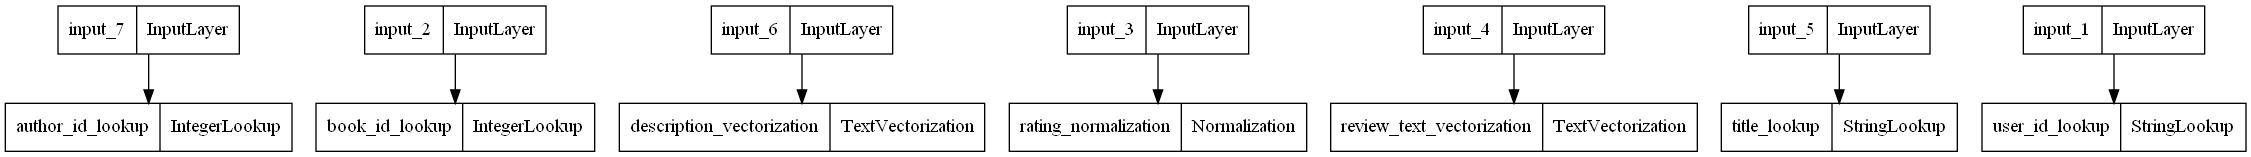

In [36]:
tf.keras.utils.plot_model(preprocessing_model)

In [38]:
combined_model()

TypeError: build() missing 1 required positional argument: 'input_shape'

In [37]:
tf.keras.utils.plot_model(combined_model)

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [38]:
tf.debugging.experimental.enable_dump_debug_info(
    "/tmp/tfdbg2_logdir",
    tensor_debug_mode="FULL_HEALTH",
    circular_buffer_size=-1)

INFO:tensorflow:Enabled dumping callback in thread MainThread (dump root: /tmp/tfdbg2_logdir, tensor debug mode: FULL_HEALTH)


In [67]:
dataset

<TensorSliceDataset shapes: ({user_id: (), book_id: (), rating: (), review_text: (), title: (), description: (), author_id: ()}, ()), types: ({user_id: tf.string, book_id: tf.uint32, rating: tf.uint8, review_text: tf.string, title: tf.string, description: tf.string, author_id: tf.int64}, tf.string)>

In [40]:
combined_model.summary(expand_nested=True)

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

### Linear Data Model

#### Linear Inputs

In [39]:
linear_inputs = {
  'user_id': tf.keras.Input(shape=(), dtype='string', name="user_id_input"),
  'book_id': tf.keras.Input(shape=(), dtype='uint32', name="book_id_input"),
  'rating': tf.keras.Input(shape=(), dtype='uint8', name="rating_input"),
  'author_id': tf.keras.Input(shape=(), dtype='int64', name="author_id_input"),
}
linear_inputs

{'user_id': <KerasTensor: shape=(None,) dtype=string (created by layer 'user_id_input')>,
 'book_id': <KerasTensor: shape=(None,) dtype=uint32 (created by layer 'book_id_input')>,
 'rating': <KerasTensor: shape=(None,) dtype=uint8 (created by layer 'rating_input')>,
 'author_id': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'author_id_input')>}

#### Linear Outputs

In [40]:
linear_outputs = {
  'user_id': user_id_lookup_layer(linear_inputs['user_id']),
  'book_id': book_id_lookup_layer(linear_inputs['book_id']),
  'rating': rating_normalization(linear_inputs['rating']),
  'author_id': author_id_lookup_layer(linear_inputs['author_id']),
}
linear_outputs

{'user_id': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'user_id_lookup')>,
 'book_id': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'book_id_lookup')>,
 'rating': <KerasTensor: shape=(1, None) dtype=float32 (created by layer 'rating_normalization')>,
 'author_id': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'author_id_lookup')>}

#### Linear Model

In [41]:
linear_input_model = tf.keras.Model(inputs=linear_inputs, outputs=linear_outputs)

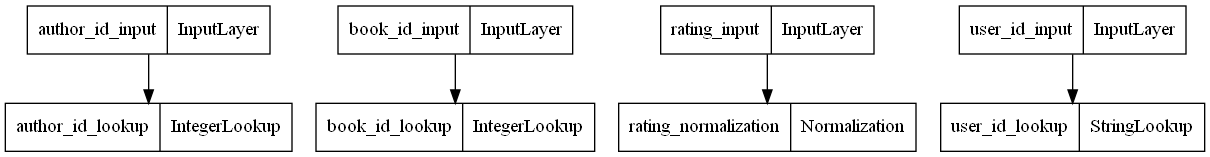

In [42]:
tf.keras.utils.plot_model(linear_input_model)

### Deep Data Model

#### Deep Inputs

In [43]:
deep_inputs = {
  'review_text': tf.keras.Input(shape=(), dtype='string', name="review_text_input"),
  'title': tf.keras.Input(shape=(), dtype='string', name="title_input"),
  'description': tf.keras.Input(shape=(), dtype='string', name="description_input"),
}
deep_inputs

{'review_text': <KerasTensor: shape=(None,) dtype=string (created by layer 'review_text_input')>,
 'title': <KerasTensor: shape=(None,) dtype=string (created by layer 'title_input')>,
 'description': <KerasTensor: shape=(None,) dtype=string (created by layer 'description_input')>}

#### Deep Outputs

In [44]:
deep_outputs = {
  'review_text': review_text_vectorization(deep_inputs['review_text']),
  'title': title_lookup_layer(deep_inputs['title']),
  'description': description_vectorization(deep_inputs['description']),
}
deep_outputs

{'review_text': <KerasTensor: shape=(None, None) dtype=int64 (created by layer 'review_text_vectorization')>,
 'title': <KerasTensor: shape=(None,) dtype=int64 (created by layer 'title_lookup')>,
 'description': <KerasTensor: shape=(None, None) dtype=int64 (created by layer 'description_vectorization')>}

#### Deep Model

In [45]:
deep_input_model = tf.keras.Model(inputs=deep_inputs, outputs=deep_outputs)

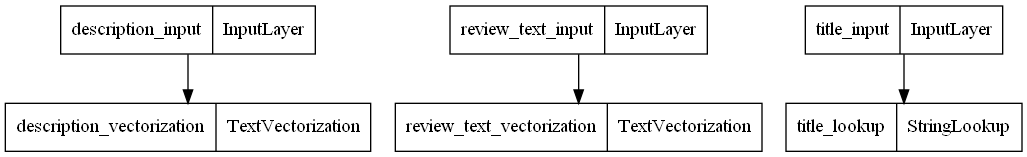

In [46]:
tf.keras.utils.plot_model(deep_input_model)

---

In [47]:
# Apply the preprocessing in tf.data.Dataset.map.
deep_dataset = dataset.map(lambda x, y: (deep_input_model(x), y),
                      num_parallel_calls=tf.data.AUTOTUNE)
# Display a preprocessed input sample.
next(deep_dataset.take(1).as_numpy_iterator())


C:\Users\simon\anaconda3\envs\ds-project\lib\site-packages\keras\engine\functional.py:559: UserWarning: Input dict contained keys ['user_id', 'book_id', 'rating', 'author_id'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


({'review_text': array([    2,   432,     7,     2,  1539,     8,     4,  1004,   470,
         38918,   135,    67,   249,     9,     4,  9002,  1389,  2696,
         11561,    11,    48,     8,   109,   187,     2,    26,     7,
             2,   135,    67,     3,    12,     7,  1052, 11907,     9,
          3574,    36,     2,    71,     3,     7,   350,    55,  1238,
         16531,   377,     2,   399,     2,    14,   774,    13,    24,
             7,    35,   304,   418,     6,  1081,    39,    68,     2,
          1754,  6327,    30,    70,     7,     2,   195,    68,    84,
           114,    11,    13,   415,  1020,     5,   804,    40,   948,
           151, 24609,    29,    30,  7092,     9,  3574,     3,    38,
             6,  1081,    39, 72221,     3, 76181,     3, 60908,     3,
         55188,     3,  2235,  6442,  4549,    13,     4,   318,  1261,
            79,   378,   119,    22,   347,  2382, 32019,    46,   911,
           121,     3,  1654,  5504, 11355,     9

In [48]:
# Apply the preprocessing in tf.data.Dataset.map.
linear_dataset = dataset.map(lambda x, y: (linear_input_model(x), y),
                      num_parallel_calls=tf.data.AUTOTUNE)
# Display a preprocessed input sample.
next(linear_dataset.take(1).as_numpy_iterator())


C:\Users\simon\anaconda3\envs\ds-project\lib\site-packages\keras\engine\functional.py:559: UserWarning: Input dict contained keys ['review_text', 'title', 'description'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


({'user_id': 963,
  'book_id': 7589,
  'rating': array([[-0.5969872]], dtype=float32),
  'author_id': 301},
 b'0e317947e1fd341f573192111bb2921d')

---

In [49]:
linear_model2 = tf.keras.experimental.LinearModel()
dnn_model2 = tf.keras.Sequential([tf.keras.layers.Dense(units=64),
                             tf.keras.layers.Dense(units=1)])
combined_model2 = tf.keras.experimental.WideDeepModel(linear_model, dnn_model)
combined_model2.compile(['sgd', 'adam'], 'mse', ['mse'])

In [53]:
combined_model2.call(next(deep_dataset.take(1).as_numpy_iterator()))

IndexError: list index out of range

In [50]:
l = linear_dataset.map(lambda x, y: x)
d = deep_dataset.map(lambda a, b: a)
y = dataset.map(lambda f, l: l)

In [103]:
combined_model.fit([l, d], y, epochs=EPOCHS)

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {"<class 'tensorflow.python.data.ops.dataset_ops.MapDataset'>"}), <class 'tensorflow.python.data.ops.dataset_ops.MapDataset'>

In [100]:
combined_model.fit([linear_columns, deep_columns], dataset, epochs=EPOCHS)


TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

### Training and Evaluating The Model
Before we train the model, let's read in the Census dataset as we did in the TensorFlow Linear Model tutorial. The code for input data processing is provided here again for your convenience:
